## Universidad de los Andes

## Programa de Maestria MINE

## Ciencia de Datos Aplicada

**Taller 1**

Como parte del ejercicio de evaluación de proyectos inmobiliarios para diversificar la inversión de la compañía en Buenos Aires, se ha generado una evaluación de los inmuebles presentes en AirBnb para el último periodo con el propósito de encontrar hallazgos claves para la toma de decisiones de inversión en finca raíz. 

**Selección del Dataset de Trabajo**

De esta manera, se ha tomado una base de 26.204 inmuebles en la que se hará un EDA preliminar para establecer posibles relaciones entre los datos que den primeras luces como información relevante para el análisis. Vale la pena resaltar que el mercado inmobiliario de Buenos Aires está caracterizado por un impacto creciente de registro de propiedades (Cerca de 25 mil unidades) y un apetito de los empresarios en Argentina que se no se comporta de manera diferente: Según Mariano Gubitosi (Infobae, 2023) "Los alquileres temporales resultan atractivos dado que los perfiles de rentabilidad del modelo de arrendamientos puede estar cerca del 9% anual"

De manera inicial, se procede con la importación de las librerías destinadas al EDA y se importa el archivo descargado de la base de Airbnb para su posterior carga.

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import plotly.express as px
import plotly.graph_objects as go
import folium as fl
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
listings_df = pd.read_csv("./listings.csv.gz")
listings_df


ModuleNotFoundError: No module named 'plotly'

_**Tamaño de la base**_ 
El dataset se tomó de la página de Inside Airbnb cque cuenta con datos de decenas de ciudades y países alrededor del mundo y ha sido publicada de manera pública para facilitar el análisis de los usuarios interesados. En particular, para la ciudad de Buenos Aires se tomaron datos para 26.204 inmuebles en arrendamiento con información de 75 atributos que abarcan toda la información que se puede recolectar de las publicaciones de inmuebles en la aplicación.

In [7]:
listings_df.shape

(26204, 75)

Se procede con la eliminación de los posibles datos duplicados que tenga la base

In [62]:
listings_df = listings_df.drop_duplicates()

Con el comando info, buscaremos conocer algunas de las características más importante del Dataframe, en cuanto a forma, columnas, valores nulos, entre otros.

In [65]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26204 entries, 0 to 26203
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26204 non-null  int64  
 1   listing_url                                   26204 non-null  object 
 2   scrape_id                                     26204 non-null  int64  
 3   last_scraped                                  26204 non-null  object 
 4   source                                        26204 non-null  object 
 5   name                                          26204 non-null  object 
 6   description                                   25635 non-null  object 
 7   neighborhood_overview                         14590 non-null  object 
 8   picture_url                                   26204 non-null  object 
 9   host_id                                       26204 non-null 

In [66]:
listings_df.sample(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
12502,575193115855308184,https://www.airbnb.com/rooms/575193115855308184,20230628025456,2023-06-28,city scrape,Hostel in San Nicolás · ★4.80 · 1 bedroom · 1 ...,Che Juan Hostel BA features air-conditioned ro...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,149461466,https://www.airbnb.com/users/show/149461466,Juan Francisco,2017-09-06,"Ramos Mejía, Argentina",NaN,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/95e48...,https://a0.muscache.com/im/pictures/user/95e48...,NaN,13,14,"['email', 'phone', 'work_email']",t,t,NaN,San Nicolas,NaN,-34.602890,-58.373340,Shared room in hostel,Shared room,1,NaN,1 shared bath,NaN,1.0,"[""Air conditioning"", ""Kitchen"", ""Building staf...","$2,548.00",1,1125,1,1,1,1125,1.0,41.2,NaN,t,25,55,85,360,2023-06-28,5,5,0,2022-07-15,2023-02-08,4.80,5.00,4.80,5.00,5.00,5.00,4.80,NaN,t,12,0,0,12,0.43
13558,625415782114981205,https://www.airbnb.com/rooms/625415782114981205,20230628025456,2023-06-28,city scrape,Condo in Palermo · ★4.81 · 2 bedrooms · 3 beds...,Amplio departamento de 150 m2 distribuidos en ...,El departamento se encuentra en el corazon de ...,https://a0.muscache.com/pictures/miso/Hosting-...,458807271,https://www.airbnb.com/users/show/458807271,Lucia,2022-05-12,NaN,NaN,within a day,100%,98%,t,https://a0.muscache.com/im/pictures/user/d1789...,https://a0.muscache.com/im/pictures/user/d1789...,NaN,2,2,['phone'],t,t,"Palermo, Buenos Aires, Argentina",Palermo,NaN,-34.592280,-58.416690,Entire condo,Entire home/apt,4,NaN,2.5 baths,2.0,3.0,"[""Free street parking"", ""Hot water"", ""Fire ext...","$21,330.00",4,90,4,4,90,90,4.0,90.0,NaN,t,15,40,70,70,2023-06-28,27,27,1,2022-07-10,2023-06-19,4.81,4.85,4.85,4.96,4.93,4.89,4.78,NaN,f,2,2,0,0,2.29
17147,752177485534569872,https://www.airbnb.com/rooms/752177485534569872,20230628025456,2023-06-28,city scrape,Condo in Belgrano · ★5.0 · Studio · 2 beds · 1...,Monoambiente para 2 personas en el barrio de B...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,55553719,https://www.airbnb.com/users/show/55553719,For Rent Argentina,2016-01-21,NaN,NaN,within a few hours,100%,80%,f,https://a0.muscache.com/im/pictures/user/20c0b...,https://a0.muscache.com/im/pictures/user/20c0b...,San Nicolás,147,199,"['email', 'phone']",t,t,NaN,Belgrano,NaN,-34.558961,-58.461232,Entire condo,Entire home/apt,2,NaN,1 bath,NaN,2.0,"[""Free street parking"", ""Hot water"", ""Paid par...","$14,521.00",3,180,3,3,180,180,3.0,180.0,NaN,t,0,0,21,296,2023-06-28,3,3,0,2022-11-12,2023-01-11,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,147,147,0,0,0.39
10894,51552143,https://www.airbnb.com/rooms/51552143,20230628025456,2023-06-29,city scrape,Condo in CABA · ★4.97 · 

In [61]:
listings_df.dtypes
listings_df.sample(100)
listings_df["id"].nunique()

26204

**Estrategia de Análisis**

Con base en el dataframe escogida y su explicación previa, se buscará ahondar en una estrategia de estadística descriptiva univariada y multivariada para generar hallazgos que permitan tomar decisiones de inversión. Se utilizarán técnicas de estadística descriptiva y de inferencia estadística para tal fin.

A priori se buscarán establecer relaciones de cara al precio y su relación con la ocupación de los inmuebles, por lo que el deseable de la investigación es encontrar las caracterísiticas del inmueble que más se traduzcan en oportunidades de inversión para la compañía. Así, es posible inclusive generar opciones de inversión según el perfil de riesgo del inversionista, en donde datos que más se repiten pueden estar asociados a un perfil bajo de riesgo y a medida que nos acercamos a los outliers del dataframe, inducir ventajas a partir de la estadística descriptiva para inversión de medio o alto riesgo.

De manera operativa, haremos cálculos a través de conteo, características de distribución, análisis gráficos, correlaciones estadísticas, entre otras que serán descritas a medida que se vaya avanzando.

In [11]:
listings_df["neighbourhood_cleansed"].unique()

array(['Palermo', 'Recoleta', 'Nuñez', 'Monserrat', 'Balvanera', 'Retiro',
       'Constitucion', 'Barracas', 'San Nicolas', 'Chacarita', 'Almagro',
       'Puerto Madero', 'Villa Crespo', 'Belgrano', 'Coghlan',
       'Parque Chacabuco', 'San Cristobal', 'Villa Urquiza', 'San Telmo',
       'Boedo', 'Colegiales', 'Boca', 'Caballito', 'Villa Luro',
       'Villa Devoto', 'Saavedra', 'Flores', 'Monte Castro',
       'Villa Ortuzar', 'Villa Gral. Mitre', 'Velez Sarsfield',
       'Parque Patricios', 'Villa Del Parque', 'Floresta', 'Paternal',
       'Villa Pueyrredon', 'Villa Santa Rita', 'Liniers', 'Agronomia',
       'Parque Avellaneda', 'Villa Real', 'Parque Chas', 'Villa Lugano',
       'Versalles', 'Nueva Pompeya', 'Villa Riachuelo', 'Villa Soldati',
       'Mataderos'], dtype=object)

**Desarrollo de la Estrategia**

Como parte del entendimiento de los datos, se escogerán 5 atributos que son importantes a la hora de tomar decisiones de inversión en Buenos Aires. A saber, se tomarán las variables de precio, disponibilidad a 30,60,90 y 365 días, reviews mensuales, vecindario.

Cerca del 50% de la oferta de los inmuebles está en las provincias de Palermo, Recoleta y San Nicolás.
El 90% de los inmuebles en oferta son hogares enteros, a diferencia de las categorías de habitación privada, compartida o cuarto de hotel.
El 66% de las unidades pertenecen a una unidad de renta completa, seguido del 12% que corresponde un condominio completo.
El 70% de las unidades tienen acomodación hasta para 3 personas.
El 90% de las unidades tienen máximo hasta 2 baños en sus acomodaciones.
El 90% de los inmuebles tienen máximo 3 habitaciones.



In [67]:
listings_df["neighbourhood_cleansed"].value_counts(dropna=False, normalize=True)

neighbourhood_cleansed
Palermo              0.335827
Recoleta             0.148565
San Nicolas          0.058731
Belgrano             0.054076
Retiro               0.047703
Monserrat            0.039879
Almagro              0.035605
Villa Crespo         0.033964
Balvanera            0.032323
San Telmo            0.027057
Colegiales           0.023775
Nuñez                0.022935
Caballito            0.019577
Chacarita            0.016448
Constitucion         0.012784
Villa Urquiza        0.012365
Puerto Madero        0.011410
Barracas             0.007823
Saavedra             0.007174
San Cristobal        0.005305
Flores               0.004732
Villa Ortuzar        0.003969
Coghlan              0.003587
Villa Devoto         0.003473
Boca                 0.003358
Boedo                0.003244
Villa Del Parque     0.003129
Parque Chacabuco     0.002595
Parque Patricios     0.002557
Parque Chas          0.002328
Villa Pueyrredon     0.002061
Paternal             0.001565
Agronomia        

In [70]:
listings_df["room_type"].value_counts(dropna=False, normalize=True)

room_type
Entire home/apt    0.898947
Private room       0.089414
Shared room        0.007861
Hotel room         0.003778
Name: proportion, dtype: float64

In [73]:
listings_df["property_type"].value_counts(dropna=False, normalize=True)

property_type
Entire rental unit                    0.664631
Entire condo                          0.126278
Private room in rental unit           0.037361
Entire serviced apartment             0.036521
Entire loft                           0.028278
Private room in home                  0.020989
Entire home                           0.017936
Entire vacation home                  0.017822
Private room in condo                 0.007213
Private room in casa particular       0.004160
Room in hotel                         0.003320
Private room in bed and breakfast     0.003129
Private room in serviced apartment    0.002671
Shared room in rental unit            0.002328
Shared room in home                   0.002290
Room in boutique hotel                0.002061
Private room in townhouse             0.001946
Casa particular                       0.001679
Private room in villa                 0.001679
Room in bed and breakfast             0.001603
Entire townhouse                      0.001412

In [88]:
listings_df["accommodates"].value_counts(dropna=False, normalize=True)

accommodates
2     0.485308
4     0.200656
3     0.181385
1     0.052931
5     0.036368
6     0.026561
8     0.004770
7     0.004389
16    0.001946
10    0.001641
9     0.001336
12    0.000878
14    0.000611
15    0.000611
11    0.000458
13    0.000153
Name: proportion, dtype: float64

In [90]:
listings_df["bathrooms_text"].value_counts(dropna=False, normalize=True)

bathrooms_text
1 bath               0.688635
1.5 baths            0.115555
2 baths              0.072279
1 shared bath        0.032094
1 private bath       0.020417
2.5 baths            0.020264
3 baths              0.009770
1.5 shared baths     0.008854
2 shared baths       0.007861
3.5 baths            0.004465
3 shared baths       0.004160
2.5 shared baths     0.002710
4 baths              0.002099
4.5 baths            0.000992
5 baths              0.000992
4 shared baths       0.000916
NaN                  0.000878
3.5 shared baths     0.000840
0 shared baths       0.000649
5 shared baths       0.000611
6 baths              0.000611
Half-bath            0.000534
0 baths              0.000496
6.5 shared baths     0.000420
6 shared baths       0.000382
7 baths              0.000267
Shared half-bath     0.000267
5.5 baths            0.000229
9 baths              0.000229
8 baths              0.000229
8.5 shared baths     0.000191
4.5 shared baths     0.000153
6.5 baths            0.00

In [91]:
listings_df["beds"].value_counts(dropna=False, normalize=True)

beds
1.0     0.513242
2.0     0.246527
3.0     0.140589
4.0     0.054343
5.0     0.017555
NaN     0.009388
6.0     0.007785
7.0     0.002404
8.0     0.001984
9.0     0.001221
10.0    0.001107
14.0    0.000954
16.0    0.000725
11.0    0.000496
12.0    0.000382
15.0    0.000305
13.0    0.000114
23.0    0.000114
20.0    0.000114
19.0    0.000114
18.0    0.000076
25.0    0.000038
28.0    0.000038
31.0    0.000038
17.0    0.000038
33.0    0.000038
44.0    0.000038
30.0    0.000038
32.0    0.000038
22.0    0.000038
70.0    0.000038
26.0    0.000038
27.0    0.000038
Name: proportion, dtype: float64

In [92]:
listings_df["amenities"].value_counts(dropna=False, normalize=True)

amenities
["Wifi", "TV", "Air conditioning", "Kitchen"]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              0.005610
["Air conditioning", "Kitchen", "TV", "Wifi", "Washer"]                                                                                                                                                                                                                                                                                                   

In [100]:
listings_df["price_float"] = listings_df["price"].str.replace("[$,]", "", regex=True).astype(float)

In [104]:
listings_df["price_float"].describe()

count    2.620400e+04
mean     1.752933e+04
std      1.754018e+05
min      1.750000e+02
25%      7.406500e+03
50%      1.019000e+04
75%      1.528600e+04
max      2.529509e+07
Name: price_float, dtype: float64

In [103]:
listings_df["price_float"]

0        17339.0
1         7807.0
2        61868.0
3        15330.0
4        20381.0
          ...   
26199    17374.0
26200     4280.0
26201     9900.0
26202    30571.0
26203    17374.0
Name: price_float, Length: 26204, dtype: float64

Luego de generar algunos hallazgos clave en la información que más se repite para las unidades que están presentes en la oferta de Airbnb, analizaremos la distribución del precio para definir su comportamiento univariado, utilizando la información más relevante sin datos atípicos que puedan nublar el análisis.

[]

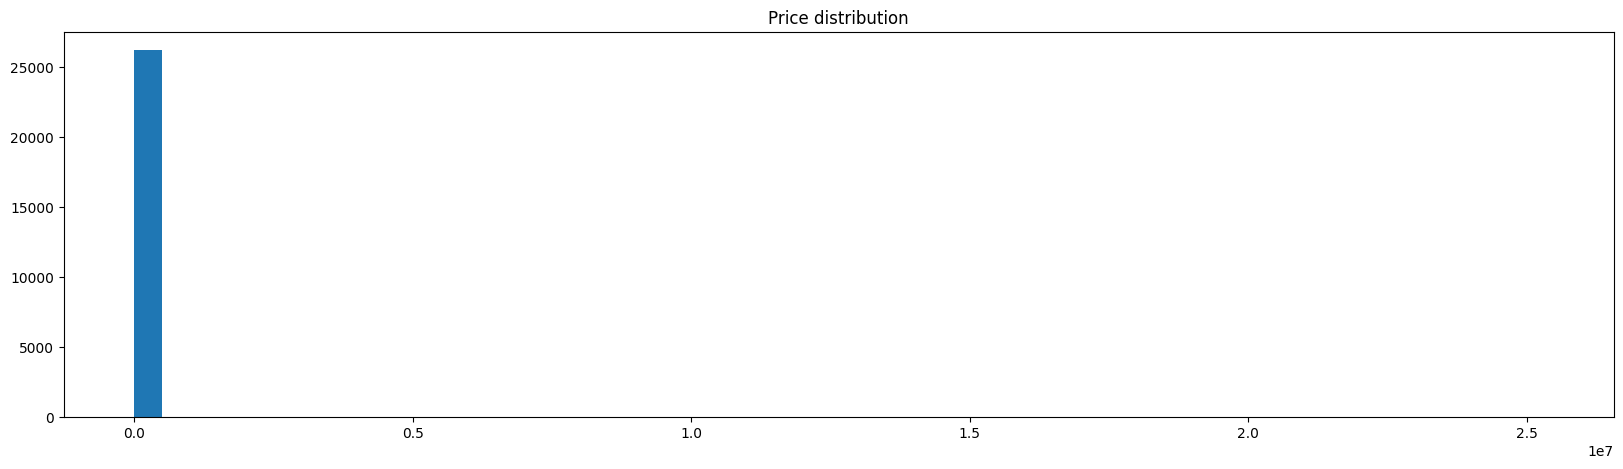

In [105]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

In [106]:
q1 = listings_df["price_float"].quantile(0.25)
q3 = listings_df["price_float"].quantile(0.75)
iqr = q3 - q1

In [115]:
q1 = listings_df["availability_30"].quantile(0.25)
q3 = listings_df["availability_30"].quantile(0.75)
iqr = q3 - q1

[]

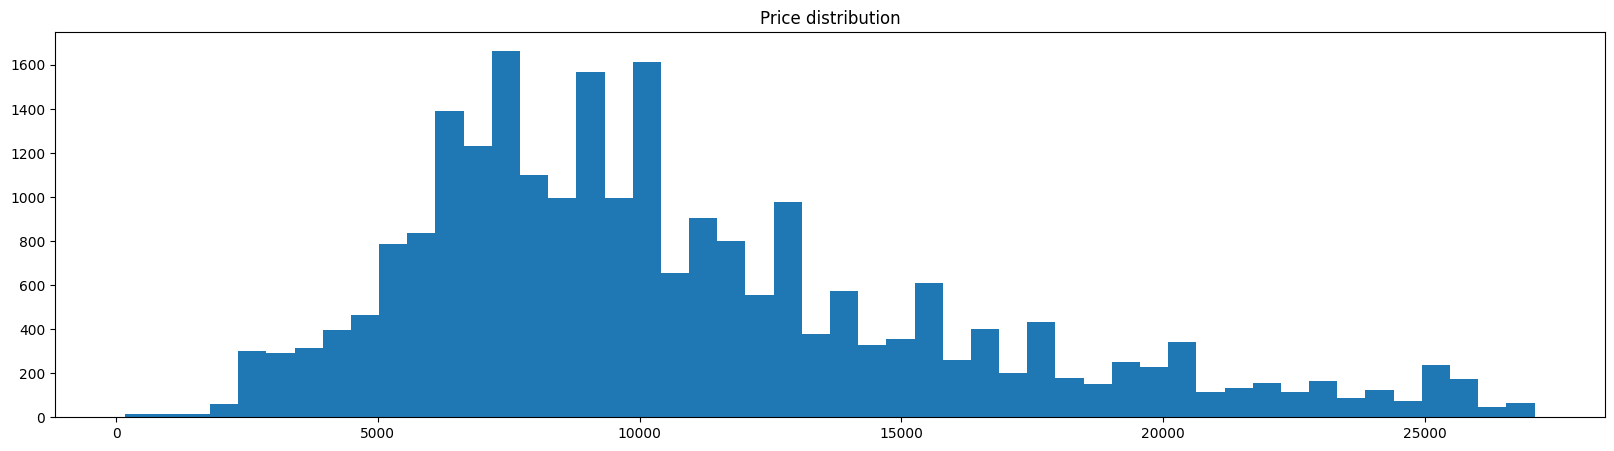

In [107]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df.loc[listings_df["price_float"] <= (q3 + 1.5 * iqr)]["price_float"], bins=50)
plt.title("Price distribution")
plt.plot()

In [143]:
import seaborn as sns
import numpy as np
sns.set_theme (font_scale=1.5, style="darkgrid")

Desde el punto de vista de la distribución del precio, se observa que la distribución tiene sesgo positivo, lo cual indica que los datos están concentrados a la izquierda de la distribución. El teste de skewness nos indica la misma información.

Desde la curtosis también es posible observar que los datos muestran más voleres atípicos extremos que una distribución normal. Esto también valida la normalización de la serie que se hace a través del rango intercuartílico.

In [112]:
listings_df["price_float"].skew()

117.7704101884131

In [113]:
listings_df["price_float"].kurtosis()

16533.599058170374

[]

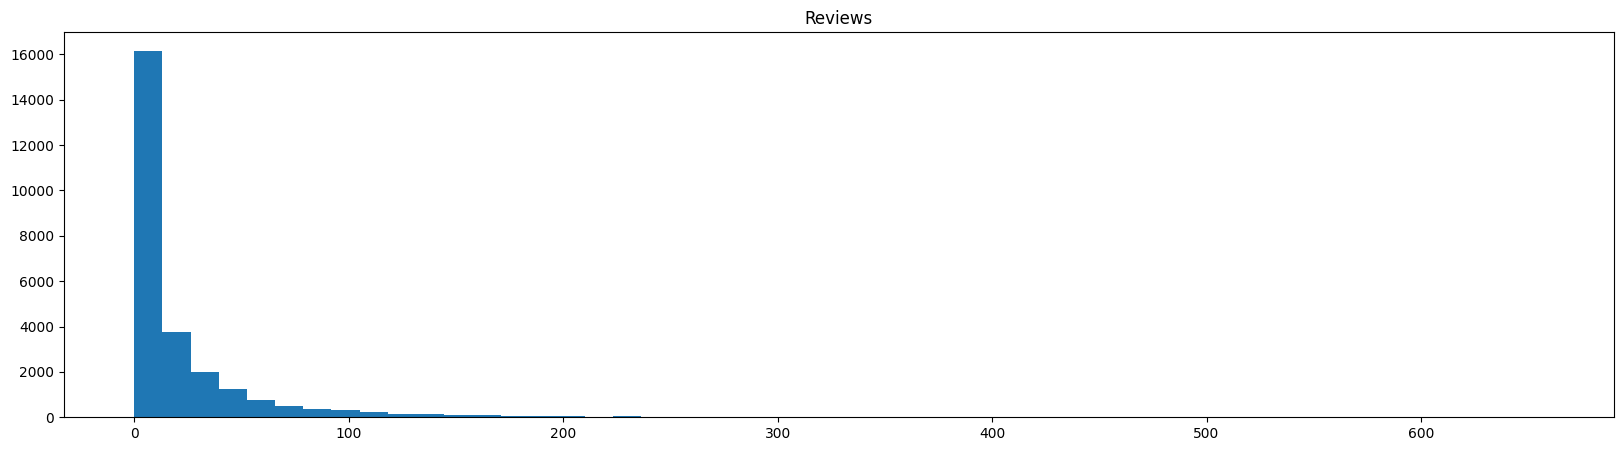

In [117]:
plt.figure(figsize=(20, 5))
plt.hist(listings_df["number_of_reviews"], bins=50)
plt.title("Reviews")
plt.plot()

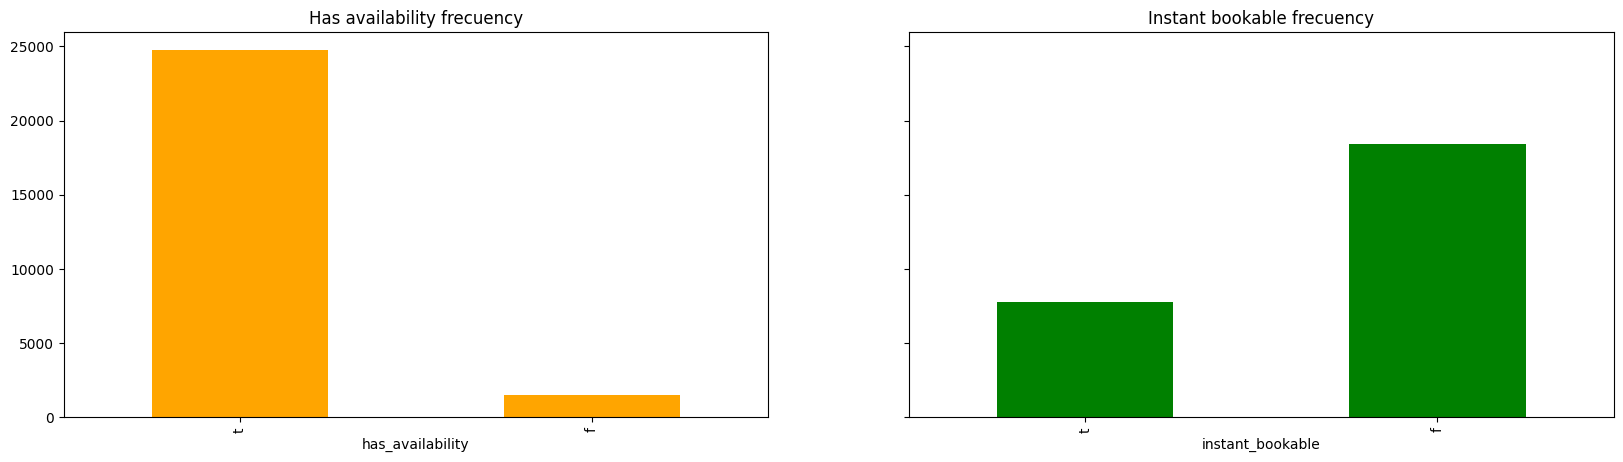

In [83]:
# Plotting bar charts for has availability and instant bookable
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
listings_df["has_availability"].value_counts().plot(kind="bar", ax=ax1, color="orange")
listings_df["instant_bookable"].value_counts().sort_index(ascending=False).plot(kind="bar", ax=ax2, color="green")
ax1.set_title("Has availability frecuency")
ax2.set_title("Instant bookable frecuency")
plt.show()

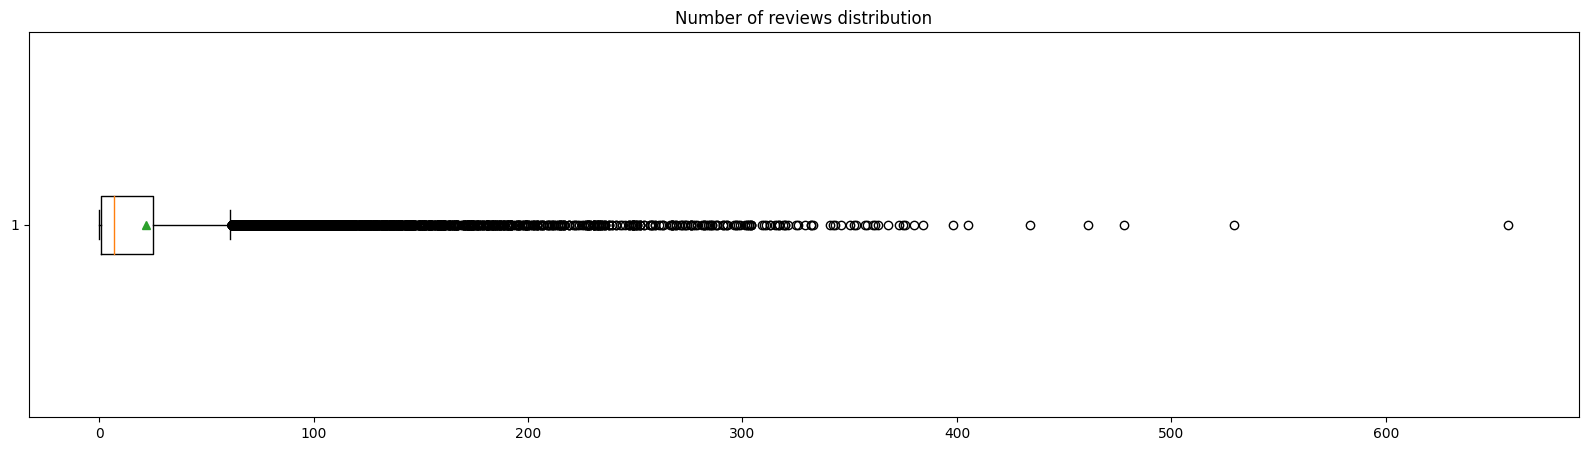

In [118]:
# Plotting a boxplot for number of reviews
plt.figure(figsize=(20, 5))
plt.boxplot(listings_df["number_of_reviews"], showmeans=True, vert=False)
plt.title("Number of reviews distribution")
plt.show()

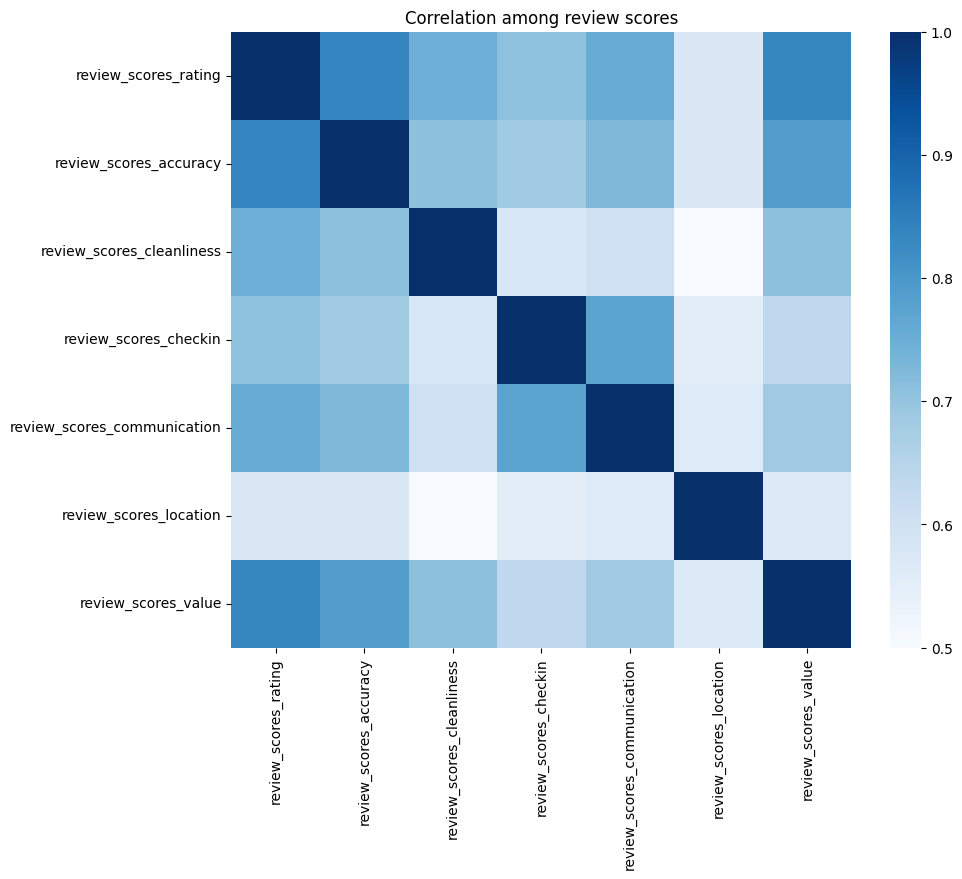

In [119]:
# Plotting correlation heatmap among review scores
plt.figure(figsize=(10, 8))
sns.heatmap(
    listings_df[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value"]].corr(),
    vmin=0.5, vmax=1,
    cmap="Blues"
)
plt.title("Correlation among review scores")
plt.show()

Desde el punto de vista estadístico, es necesario observar fenómenos de correlación a través de las variables. En esta caso, la gráfica posterior no indica una zona de alta correlación concentrada en las variables en la mayoría, por esta razón usaremos la teoría para evidenciar relaciones más pequeñas entre variables que orienten el análisis.

In [86]:
listings_df.corr(method='pearson', min_periods=1, numeric_only=True)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_float
id,1.000000,NaN,0.364938,0.086184,0.060928,NaN,0.013763,-0.060125,0.020357,NaN,-0.054477,-0.033800,-0.082978,-0.156288,-0.085290,-0.085094,0.015534,0.015534,-0.084515,0.015534,NaN,0.137332,0.180725,0.197949,0.166590,-0.382951,-0.149242,0.107279,0.058402,-0.000327,0.072500,-0.043130,-0.035480,-0.043662,0.026379,0.102392,0.106506,-0.007364,0.016842,0.377780,-0.012533
scrape_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,0.364938,NaN,1.000000,-0.078626,-0.085521,NaN,-0.050394,-0.000417,-0.015731,NaN,-0.062810,-0.031474,-0.049017,-0.074463,-0.051971,-0.053099,0.030756,0.030756,-0.052388,0.030756,NaN,0.047787,0.057612,0.058388,0.043228,-0.168949,-0.016211,0.061900,0.007774,-0.024533,0.013654,-0.038022,-0.045122,-0.036424,0.006847,-0.145521,-0.145709,-0.001439,0.013149,0.199196,0.004292
host_listings_count,0.086184,NaN,-0.078626,1.000000,0.964902,NaN,0.019036,0.039910,0.046634,NaN,0.016572,0.044014,-0.021519,0.004588,-0.024093,-0.020808,-0.003967,-0.003967,-0.021428,-0.003967,NaN,0.071526,0.072572,0.069092,0.050159,-0.035555,0.017883,0.003302,-0.097551,-0.109770,-0.072498,-0.144557,-0.159686,-0.038984,-0.148082,0.677226,0.669346,0.191944,0.011365,0.072648,0.029289
host_total_listings_count,0.060928,NaN,-0.085521,0.964902,1.000000,NaN,0.014617,0.035946,0.041879,NaN,0.016280,0.040583,-0.014041,0.008999,-0.016117,-0.009208,-0.003860,-0.003860,-0.011567,-0.003860,NaN,0.057816,0.055233,0.050812,0.053078,-0.035999,0.003407,-0.006120,-0.095054,-0.107210,-0.072132,-0.139353,-0.153837,-0.041214,-0.150024,0.562882,0.555382,0.180166,0.002453,0.047334,0.033613
neighbourhood_group_cleansed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.013763,NaN,-0.050394,0.019036,0.014617,NaN,1.000000,-0.555226,0.007784,NaN,-0.002572,-0.038423,0.026993,-0.004881,0.032299,0.033888,-0.010180,-0.010180,0.033909,-0.010180,NaN,0.021641,0.016115,0.012881,-0.011322,0.008070,0.021222,-0.005804,0.026904,0.034927,0.035235,0.028121,0.036474,0.131388,0.015564,0.033871,0.044817,-0.093144,-0.043949,0.008145,0.005681
longitude,-0.060125,NaN,-0.000417,0.039910,0.035946,NaN,-0.555226,1.000000,0.024613,NaN,0.033100,0.053058,-0.019916,0.005231,-0.023790,-0.022344,0.026592,0.026592,-0.023190,0.026592,NaN,-0.066130,-0.042003,-0.033359,-0.009627,0.076528,0.081007,0.096694,-0.040752,-0.048098,-0.038890,-0.042021,-0.048935,0.003073,-0.028314,0.039686,0.031464,0.061247,0.052350,0.065170,-0.000893
accommodates,0.020357,NaN,-0.015731,0.046634,0.041879,NaN,0.007784,0.024613,1.000000,NaN,0.644983,0.740726,-0.009168,0.026290,-0.010894,-0.009999,-0.009665,-0.009665,-0.010875,-0.009665,NaN,-0.091924,-0.052830,-0.028391,0.027928,0.021774,0.039025,0.059289,-0.007325,-0.032091,-0.002038,-0.004194,-0.002918,-0.000055,-0.023122,0.075821,0.084497,-0.051844,-0.045962,0.046350,0.039326
bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

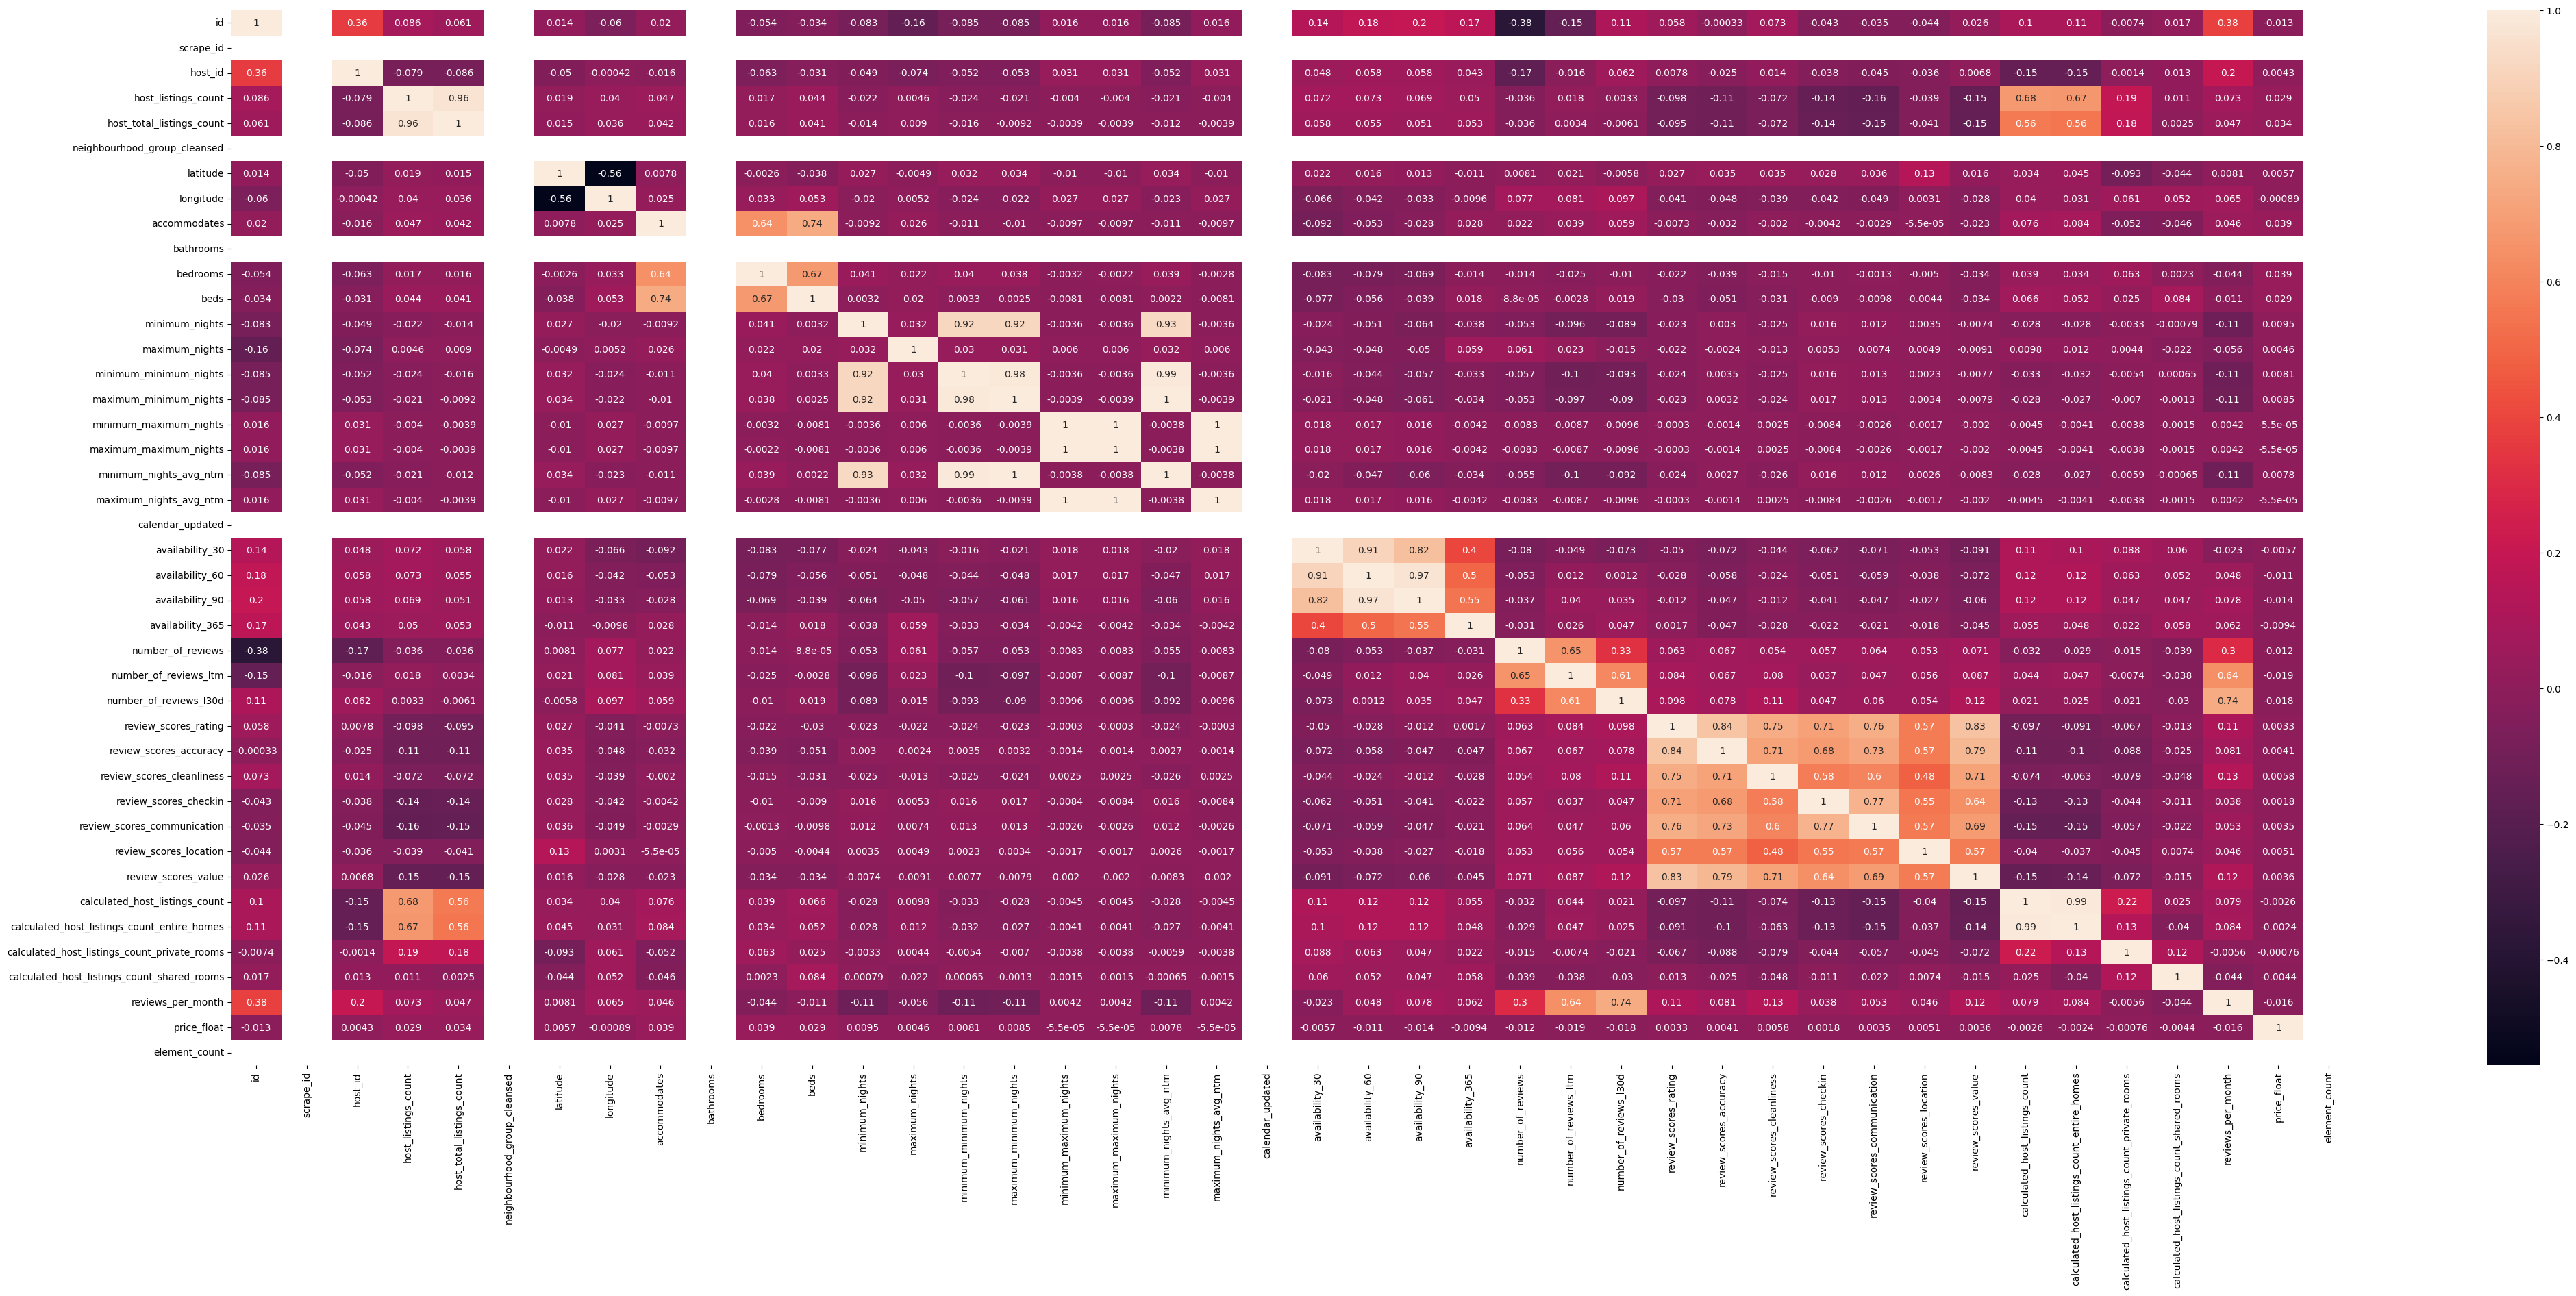

In [120]:
sns.heatmap(listings_df.corr(method='pearson', min_periods=1, numeric_only=True), annot = True)

plt.rcParams['figure.figsize'] = (100,40)

plt.show()

El número de reviews es inelástico al precio, lo que quiere decir que sin importar cuanto varía el precio existen reviews de los inmuebles. No porque un inmueble tenga un precio muy alto, significa que su numero de reviews va a ser bajo.

<Axes: xlabel='price_float', ylabel='number_of_reviews'>

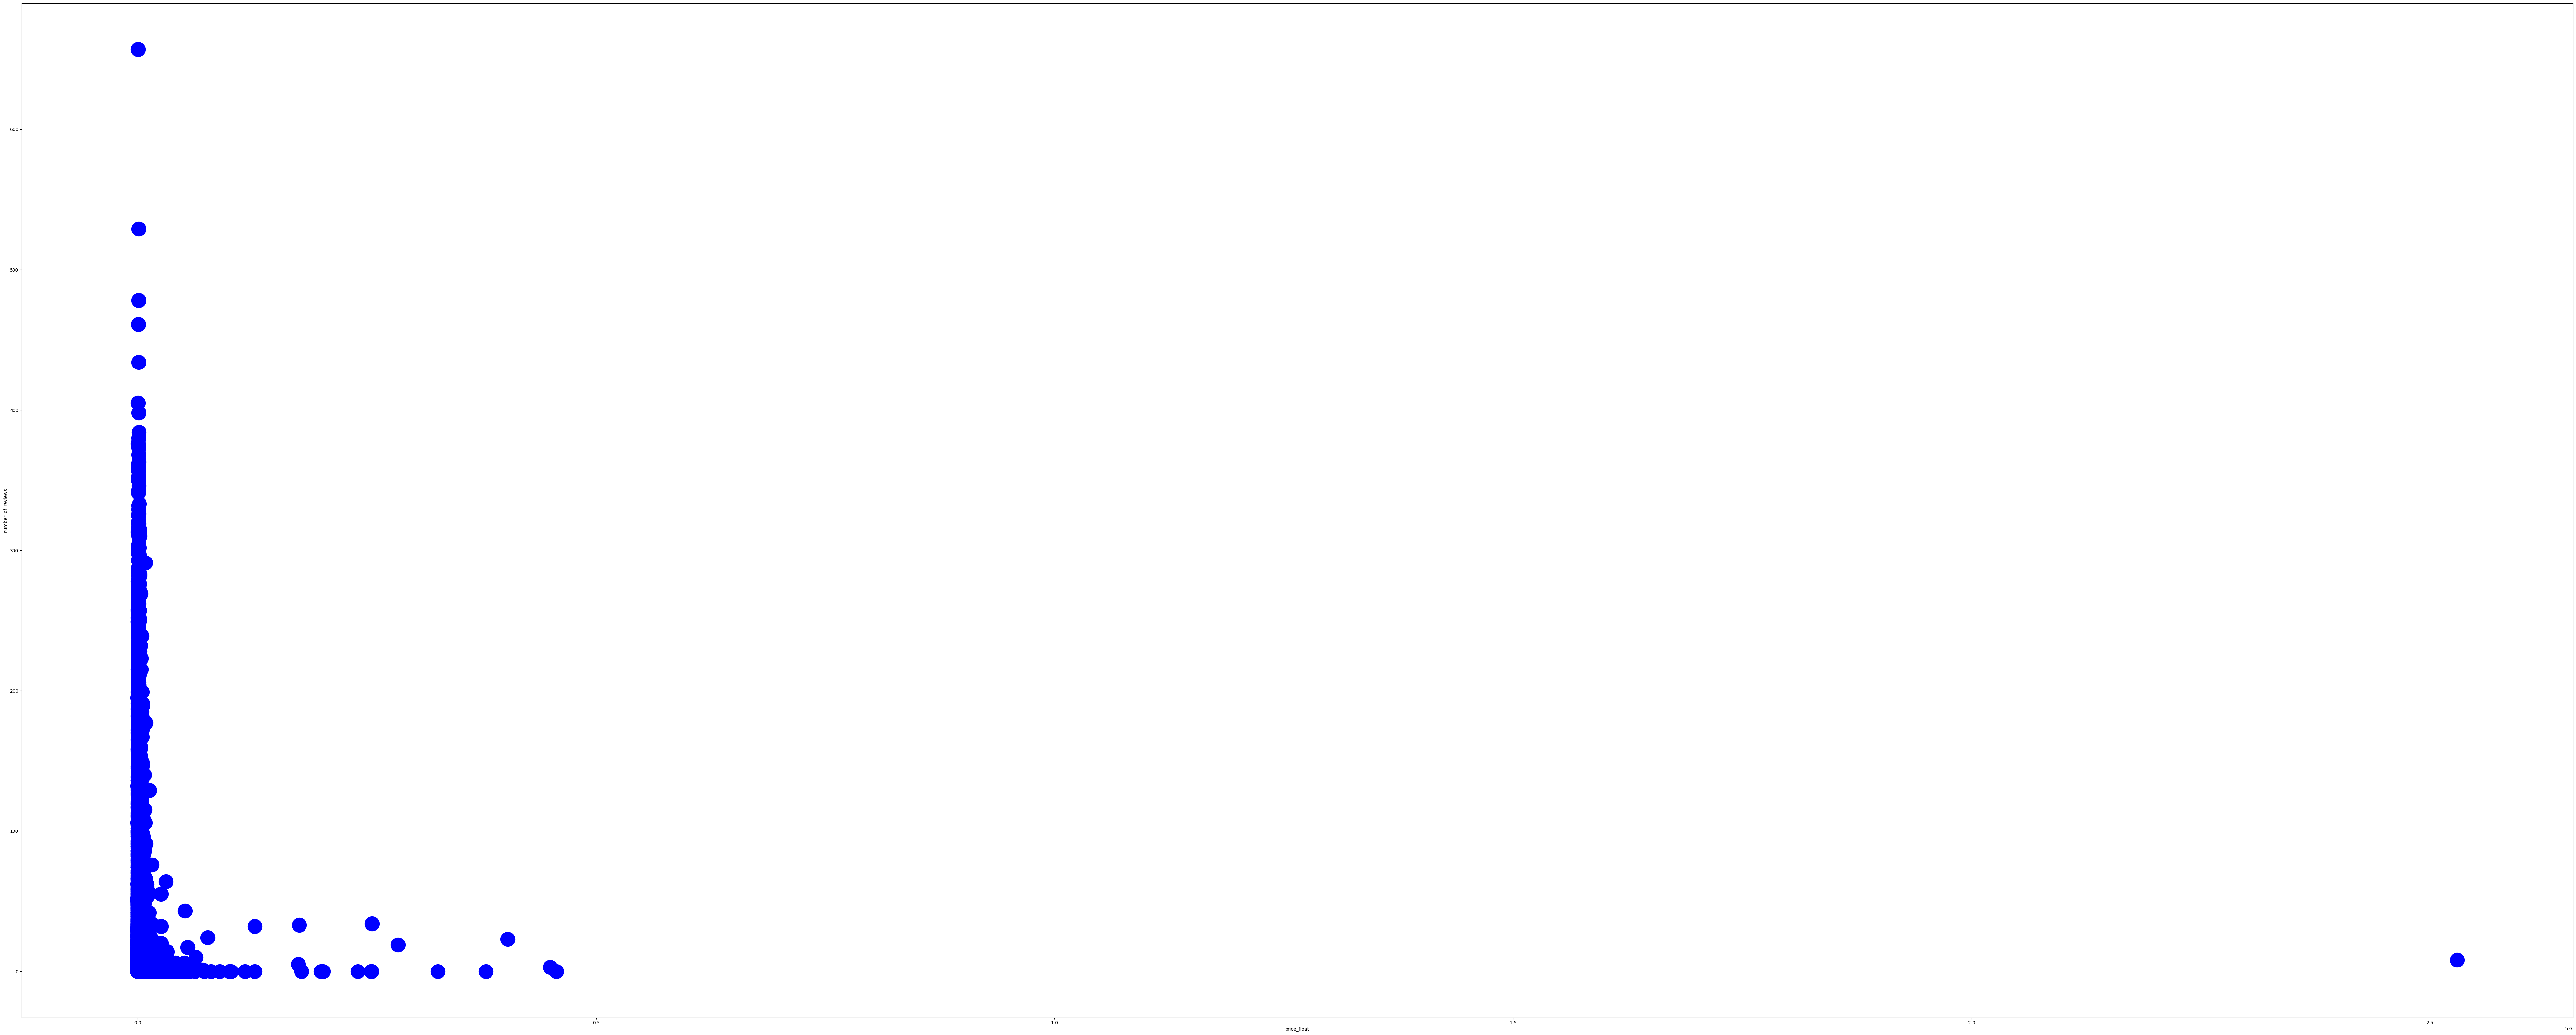

In [124]:
listings_df.plot.scatter(x = 'price_float', y = 'number_of_reviews', s = 1000, c = 'Blue')

In [157]:
import seaborn as sns

c:\Users\jonna\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


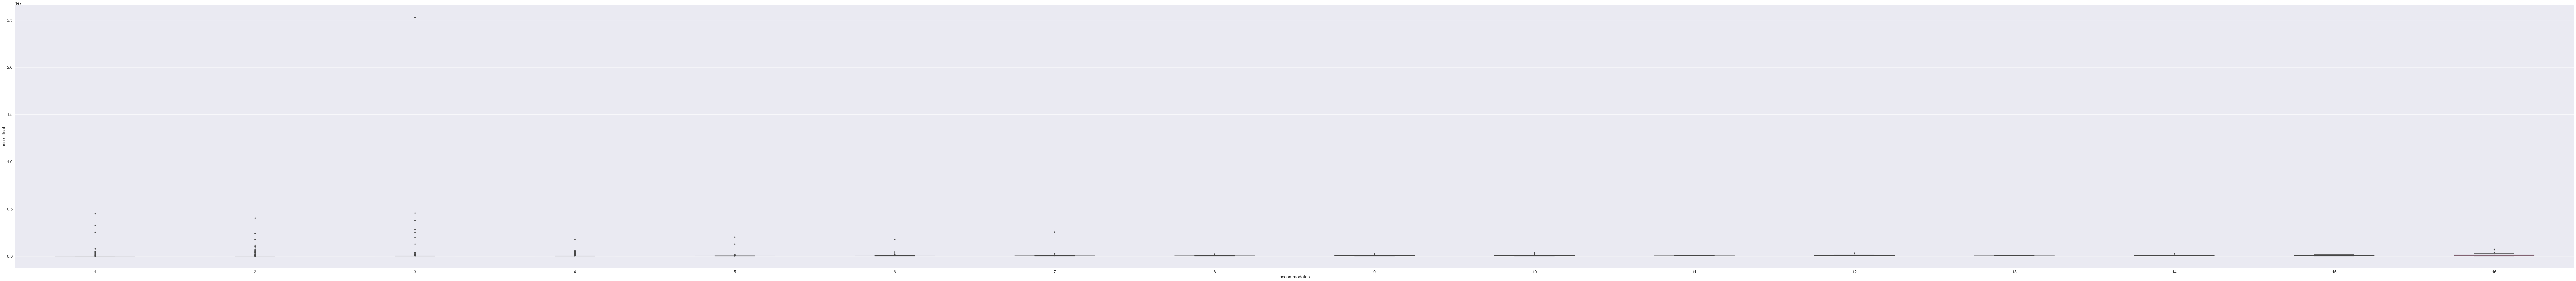

In [158]:
sns.catplot(
    data=listings_df, 
    x='accommodates', y='price_float', kind='box',
    height=16, aspect=9, width=0.5
)

In [ ]:
listings_df.plot.scatter(x = 'price_float', y = 'number_of_reviews', s = 1000, c = 'Blue')